In [6]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov() * 12

In [3]:
def portfolio_return(weights, returns):
    return weights.T @ returns

def portfolio_vol(weights, cov):
    return (weights.T @ cov @ weights) ** 0.5

l = ["Food", "Beer", "Smoke", "Coal"]
er[l]



Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [4]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.031311,0.028549,0.024730,0.000320
Beer,0.028549,0.063170,0.016305,0.020736
Smoke,0.024730,0.016305,0.100185,-0.008793
Coal,0.000320,0.020736,-0.008793,0.223692


In [7]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
portfolio_return(weights, er[l])

np.float64(0.19511097196038385)

In [8]:
portfolio_vol(weights, cov.loc[l, l])

np.float64(0.1907306490173414)

In [10]:
l = ["Games","Fin"]
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

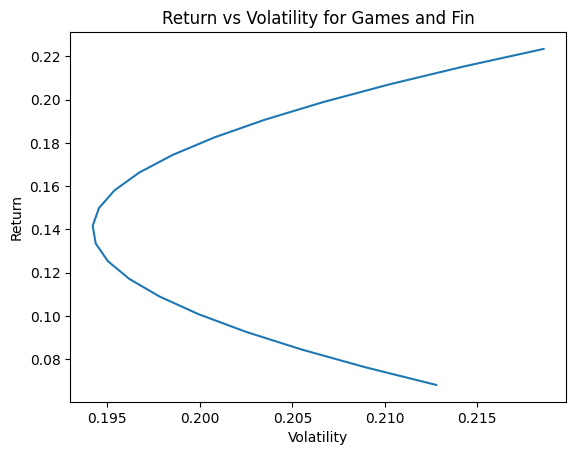

In [11]:
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l, l]) for w in weights]
import matplotlib.pyplot as plt
plt.plot(vols, rets)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Return vs Volatility for Games and Fin")
plt.show()

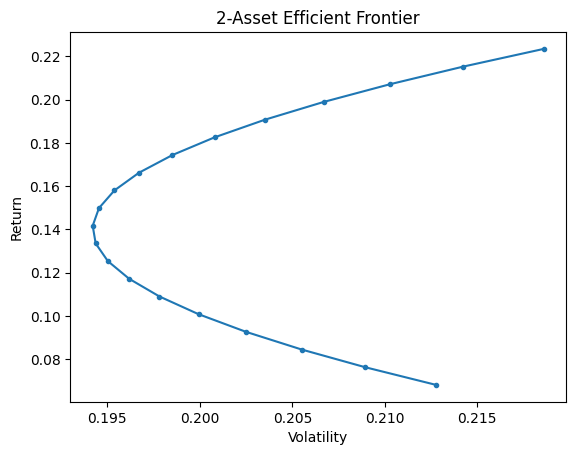

In [15]:
erk.plot_ef2(20, er[l], cov.loc[l, l])